In [1]:
import pandas as pd
# Load the CSV file (adjust the path if needed)
df = pd.read_csv('dominios.csv')
# Show the first few rows
df.head()

,id,dominio,zona,full_dominio,registered,data_readed,data_updated,expire,registrante_id,registrante_created,registrante_changed,first_dns
0,1280961,fincaelbacchante,com.ar,fincaelbacchante.com.ar,2022-07-13 13:00:23.680553-03,2025-11-20 22:06:40.232994-03,2025-11-20 22:06:40.267108-03,2026-07-13 00:00:00-03,190,2013-08-20 00:00:00-03,2025-11-24 20:21:19.064942-03,ns1.donweb.com
1,1155886,fantochenews,com.ar,fantochenews.com.ar,2021-03-17 08:19:02.328544-03,2025-11-02 16:40:51.893425-03,2025-11-02 16:40:51.930288-03,2026-03-17 00:00:00-03,63508,2013-11-07 00:00:00-03,2025-10-22 12:02:22.221565-03,ns1.technologyresources.com.ar
2,635148,rosettastone,com.ar,rosettastone.com.ar,2014-01-20 00:00:00-03,2025-11-20 08:04:52.624654-03,2025-11-20 08:04:52.662322-03,2026-02-19 00:00:00-03,4402,2013-09-12 00:00:00-03,2025-11-21 22:16:13.260101-03,dns4.p05.nsone.net
3,41,tequierocontar,com.ar,tequierocontar.com.ar,2024-12-05 19:37:50.199469-03,2025-10-14 11:30:17.781062-03,2025-10-14 11:30:17.837325-03,2025-12-05 00:00:00-03,354044,2024-12-05 19:37:49.827548-03,2024-12-05 19:38:39.920828-03,ns1.donweb.com
4,675076,vinilplata,com.ar,vinilplata.com.ar,2004-03-24 00:00:00-03,2025-11-16 00:03:52.552289-03,2025-11-16 00:03:52.613865-03,2026-04-10 00:00:00-03,75549,2014-04-09 00:00:00-03,2025-09-04 07:51:42.600144-03,ns1.huaweicloud-dns.net


In [2]:
df.describe()

,id,registrante_id
count,4.680910e+05,468091.000000
mean,1.060659e+06,131650.951766
std,3.309148e+05,120845.851815
min,4.100000e+01,2.000000
25%,7.489555e+05,22785.000000
50%,1.058894e+06,94007.000000
75%,1.403724e+06,236238.500000
max,1.525029e+06,370092.000000


expire_year
2014         2
2016         4
2018         6
2019         9
2020         5
2021        10
2022        14
2023       117
2024       171
2025     50093
2026    417643
2027         1
2100        16
Name: count, dtype: int64


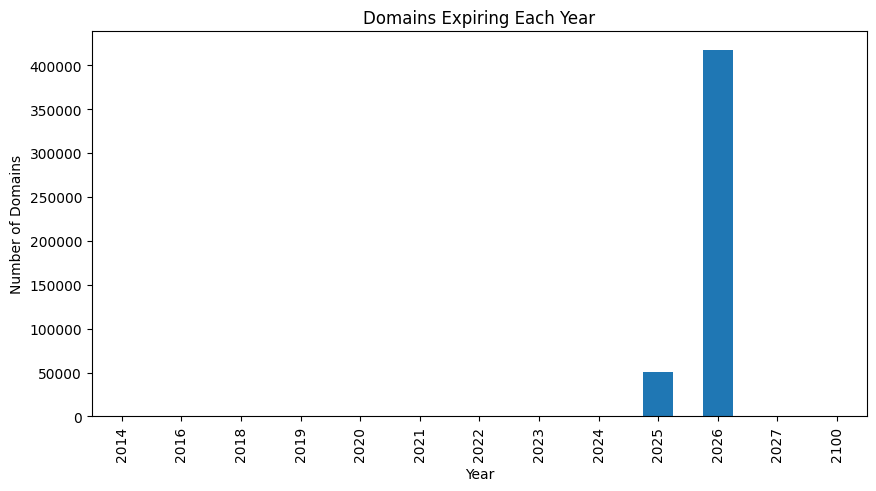

In [3]:
# Convert the 'expire' column to datetime if it's not already
df['expire'] = pd.to_datetime(df['expire'], errors='coerce')

# Extract the year from the 'expire' column
df['expire_year'] = df['expire'].dt.year

# Count the number of domains expiring each year
expiring_per_year = df['expire_year'].value_counts().sort_index()

# Display the result
print(expiring_per_year)

# Optional: Plot the result
import matplotlib.pyplot as plt
expiring_per_year.plot(kind='bar', figsize=(10,5), title='Domains Expiring Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Domains')
plt.show()

In [8]:
# Filter domains expiring in 2100
exp_2100 = df[df['expire_year'] == 2100]

# Show full domain and expiration date
result = exp_2100[['full_dominio', 'expire', 'data_readed']]
result

,full_dominio,expire,data_readed
267885,soytutienda.net.ar,2100-12-31 00:00:00-03:00,2025-11-20 21:13:45.229155-03
269443,hostea.ar,2100-12-31 00:00:00-03:00,2025-11-17 15:31:34.543206-03
271271,blockchain.ar,2100-12-31 00:00:00-03:00,2025-11-16 07:18:35.158954-03
275959,accesibilidadenlaweb.ar,2100-12-31 00:00:00-03:00,2025-04-02 05:30:56.415291-03
285042,punto.gob.ar,2100-12-31 00:00:00-03:00,2025-09-27 12:49:15.709446-03
286539,ipv6.gob.ar,2100-12-31 00:00:00-03:00,2025-09-27 12:44:35.312721-03
291672,nic.ar,2100-12-31 00:00:00-03:00,2025-10-04 13:51:03.235543-03
294865,tuorganizacion.org.ar,2100-12-31 00:00:00-03:00,2025-10-07 20:40:09.260732-03
306152,tudns.ar,2100-12-31 00:00:00-03:00,2025-10-04 02:49:08.182589-03
313727,soytutienda.ar,2100-12-31 00:00:00-03:00,2025-11-20 21:19:43.757659-03


In [9]:
# Filter domains expiring in 2100
exp_2014= df[df['expire_year'] == 2014]

# Show full domain and expiration date
result = exp_2014[['full_dominio', 'expire', 'data_readed']]
result

,full_dominio,expire,data_readed
149689,basquetriver.com.ar,2014-07-19 00:00:00-03:00,2025-11-24 12:00:06.666687-03
181216,telegar.com.ar,2014-02-17 00:00:00-03:00,2025-11-24 12:20:55.259157-03


/tmp/ipykernel_587524/532538816.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  filtered['expire_month'] = filtered['expire'].dt.to_period('M').astype(str)


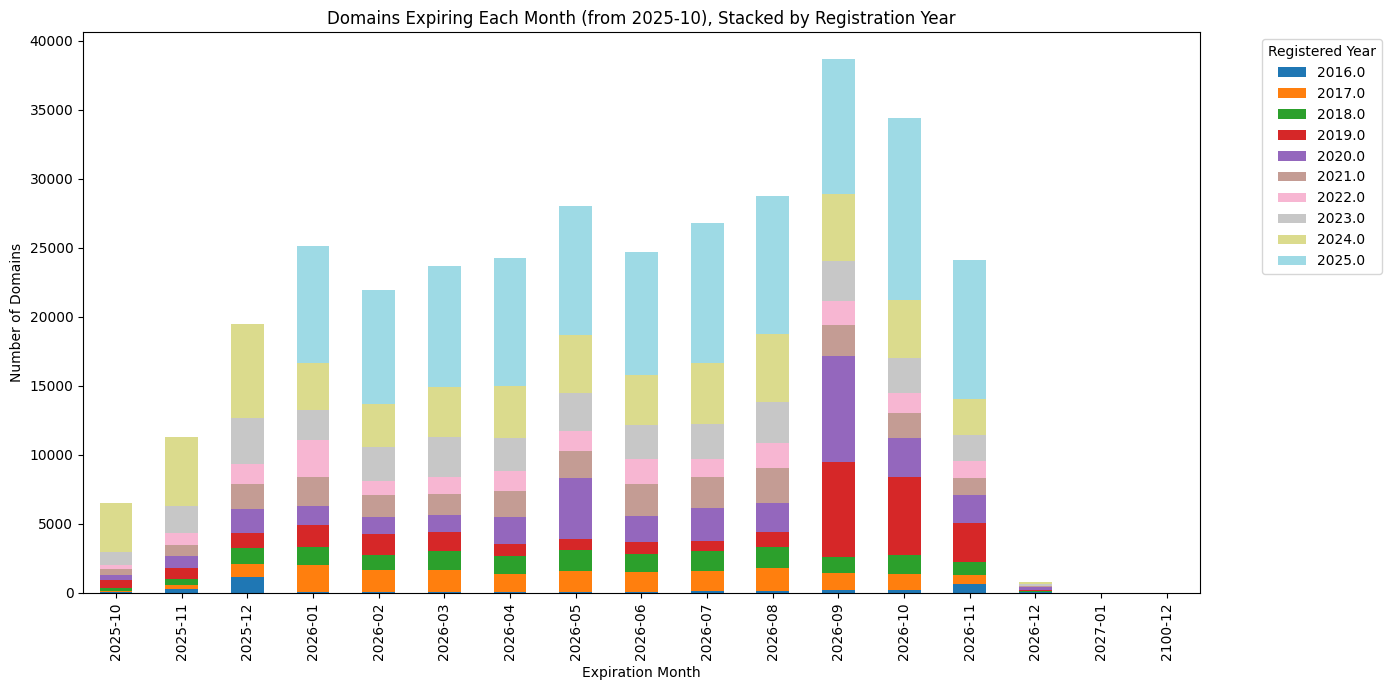

In [17]:
# Ensure dates are datetime
df['expire'] = pd.to_datetime(df['expire'], errors='coerce')
df['registered'] = pd.to_datetime(df['registered'], errors='coerce')

filtered = df[df['expire'] >= '2025-10-01'].copy()
filtered['expire_month'] = filtered['expire'].dt.to_period('M').astype(str)
filtered['registered_year'] = filtered['registered'].dt.year

# Group by expire month and registered year, then count
pivot = filtered.pivot_table(
    index='expire_month',
    columns='registered_year',
    values='full_dominio',
    aggfunc='count',
    fill_value=0
)

# Plot stacked columns
pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'
)
plt.title('Domains Expiring Each Month (from 2025-10), Stacked by Registration Year')
plt.xlabel('Expiration Month')
plt.ylabel('Number of Domains')
plt.legend(title='Registered Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

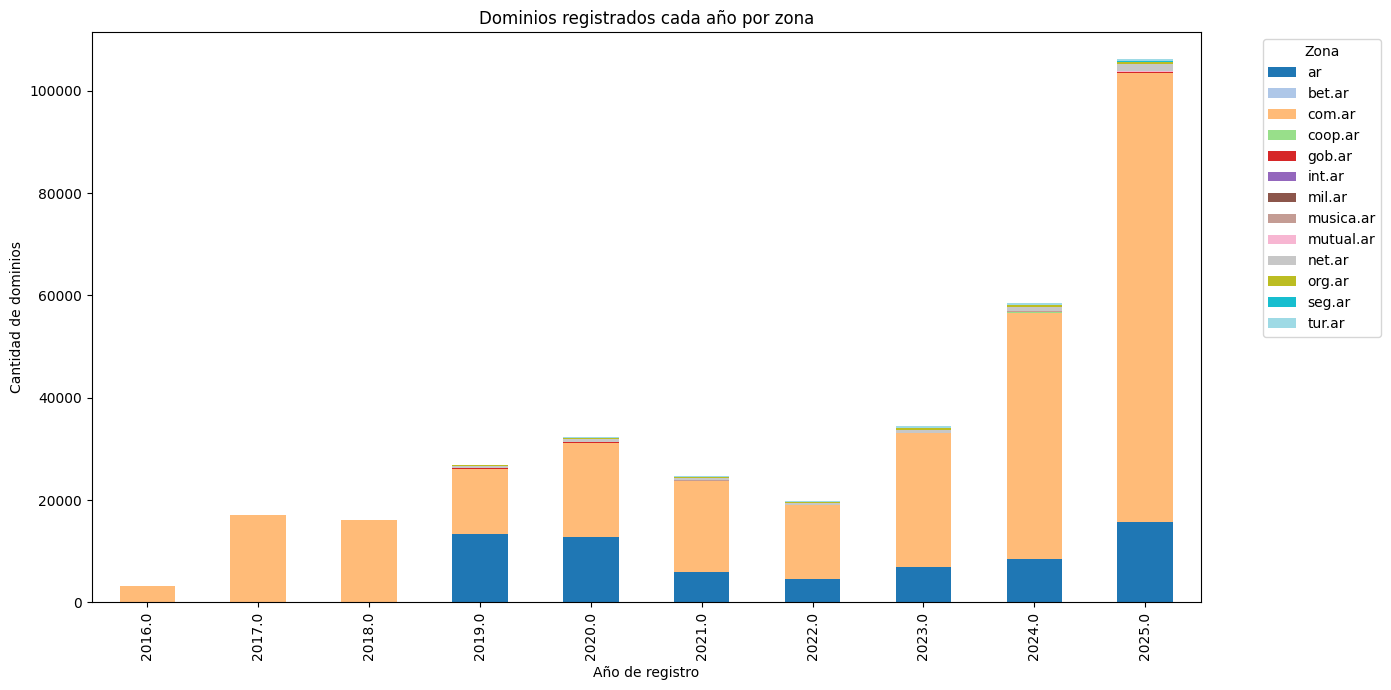

In [18]:
# Asegúrate de que las fechas sean datetime
df['registered'] = pd.to_datetime(df['registered'], errors='coerce')

# Extrae el año de registro
df['registered_year'] = df['registered'].dt.year

# Crea la tabla dinámica: filas = año, columnas = zona, valores = cantidad de dominios
pivot = df.pivot_table(
    index='registered_year',
    columns='zona',
    values='full_dominio',
    aggfunc='count',
    fill_value=0
)

# Grafica columnas apiladas
pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'
)
plt.title('Dominios registrados cada año por zona')
plt.xlabel('Año de registro')
plt.ylabel('Cantidad de dominios')
plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

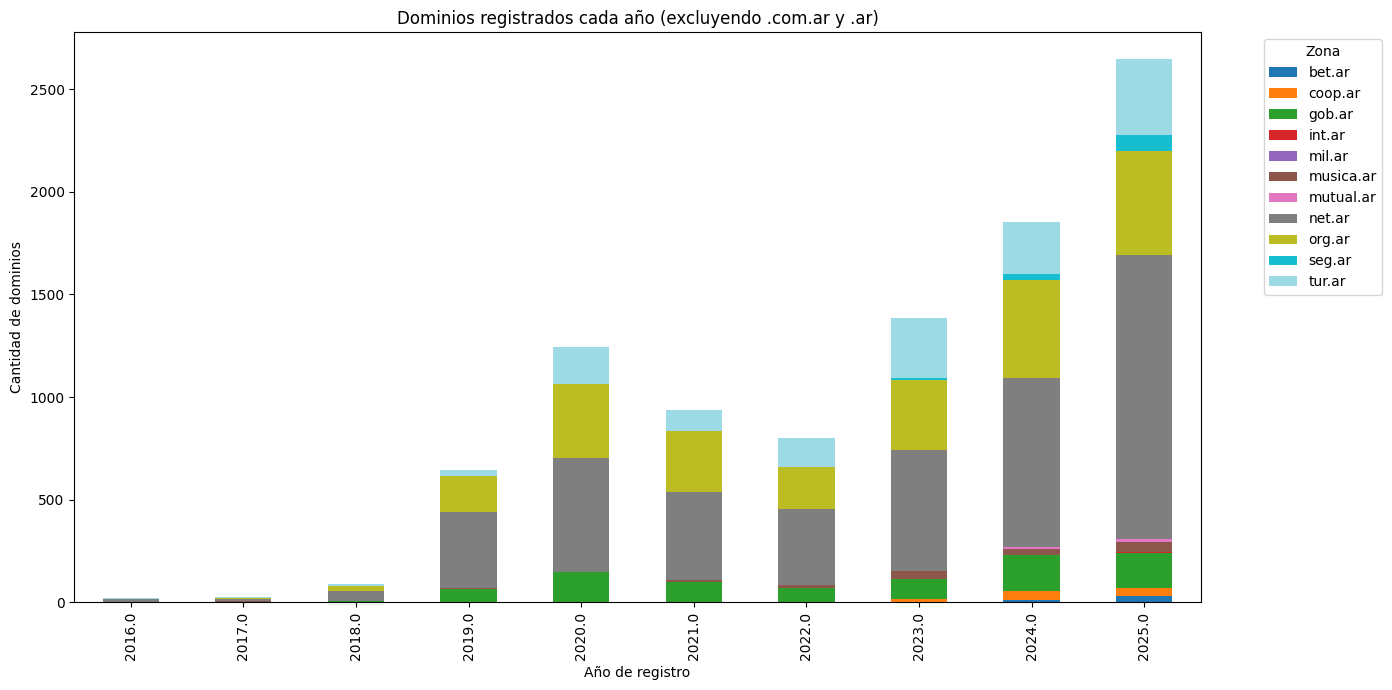

In [19]:
# Filtra las zonas que no sean 'com.ar' ni 'ar'
otros = df[~df['zona'].isin(['com.ar', 'ar'])].copy()

# Extrae el año de registro
otros['registered_year'] = otros['registered'].dt.year

# Crea la tabla dinámica: filas = año, columnas = zona, valores = cantidad de dominios
pivot_otros = otros.pivot_table(
    index='registered_year',
    columns='zona',
    values='full_dominio',
    aggfunc='count',
    fill_value=0
)

# Grafica columnas apiladas solo para las otras zonas
pivot_otros.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'
)
plt.title('Dominios registrados cada año (excluyendo .com.ar y .ar)')
plt.xlabel('Año de registro')
plt.ylabel('Cantidad de dominios')
plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_587524/632327929.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  otros['registered_month'] = otros['registered'].dt.to_period('M').astype(str)


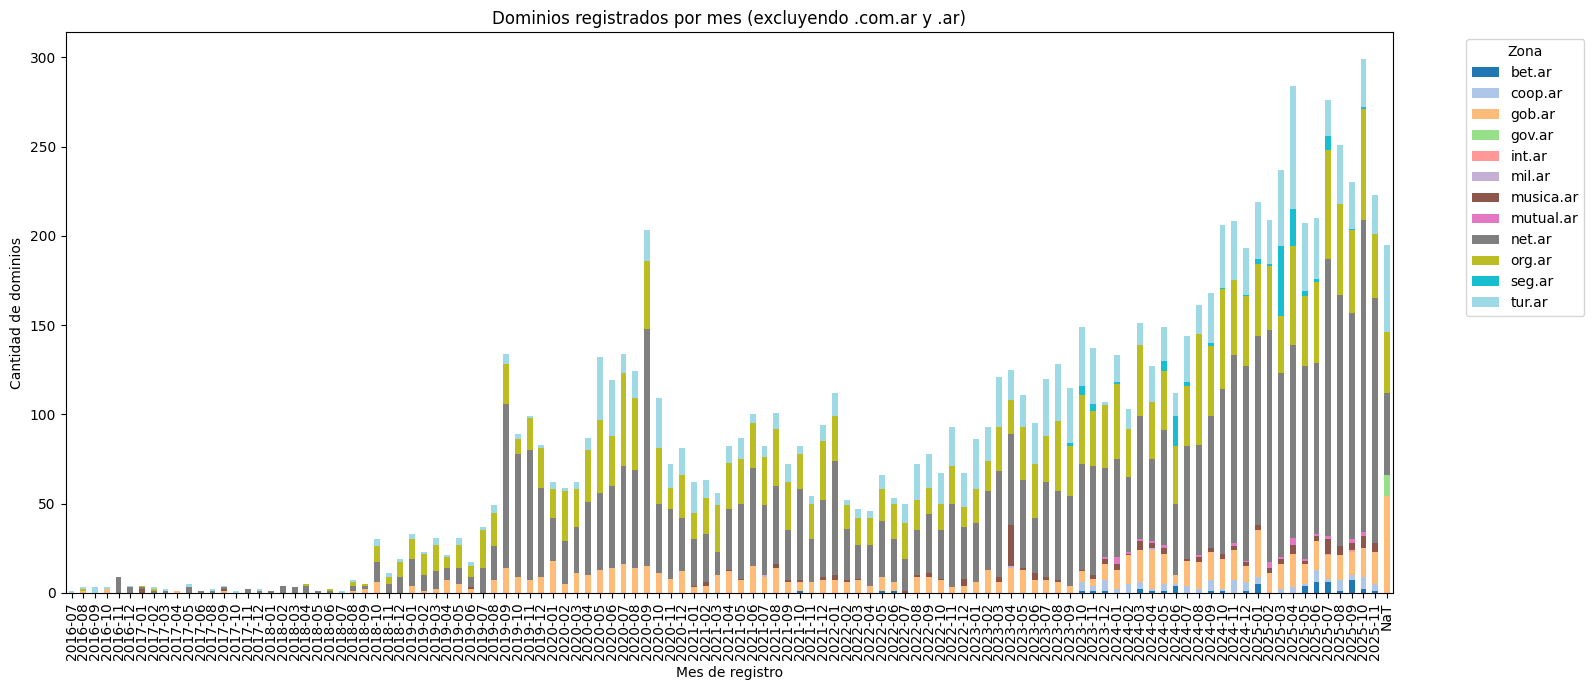

In [20]:
# Filtra las zonas que no sean 'com.ar' ni 'ar'
otros = df[~df['zona'].isin(['com.ar', 'ar'])].copy()

# Extrae el mes de registro en formato YYYY-MM
otros['registered_month'] = otros['registered'].dt.to_period('M').astype(str)

# Crea la tabla dinámica: filas = mes, columnas = zona, valores = cantidad de dominios
pivot_otros_mes = otros.pivot_table(
    index='registered_month',
    columns='zona',
    values='full_dominio',
    aggfunc='count',
    fill_value=0
)

# Grafica columnas apiladas por mes
pivot_otros_mes.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 7),
    colormap='tab20'
)
plt.title('Dominios registrados por mes (excluyendo .com.ar y .ar)')
plt.xlabel('Mes de registro')
plt.ylabel('Cantidad de dominios')
plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_587524/4263767882.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['registered_month'] = df['registered'].dt.to_period('M').astype(str)


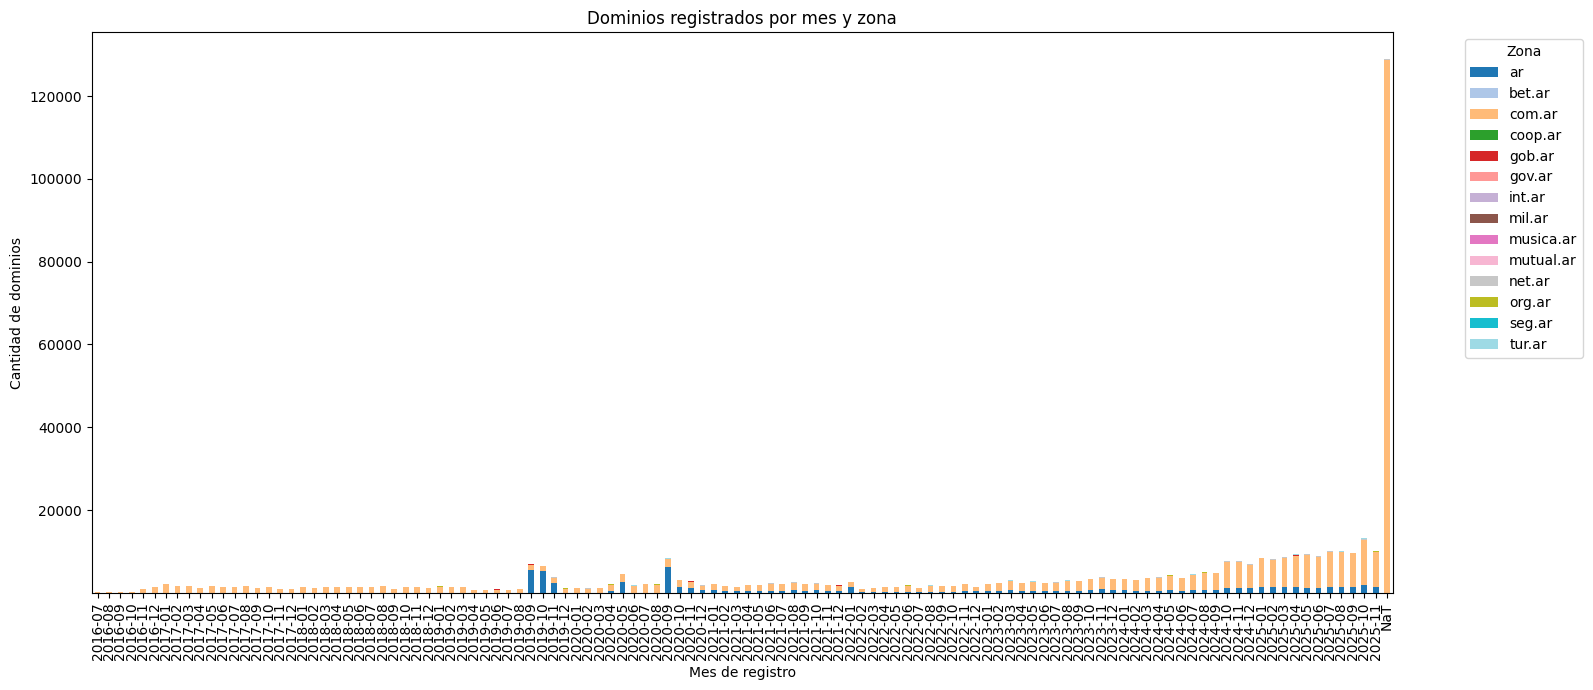

In [21]:
# Extrae el mes de registro en formato YYYY-MM
df['registered_month'] = df['registered'].dt.to_period('M').astype(str)

# Crea la tabla dinámica: filas = mes, columnas = zona, valores = cantidad de dominios
pivot_mes = df.pivot_table(
    index='registered_month',
    columns='zona',
    values='full_dominio',
    aggfunc='count',
    fill_value=0
)

# Grafica columnas apiladas por mes para todas las zonas
pivot_mes.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 7),
    colormap='tab20'
)
plt.title('Dominios registrados por mes y zona')
plt.xlabel('Mes de registro')
plt.ylabel('Cantidad de dominios')
plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
missing_registered = df[df['registered'].isna()]
missing_registered[['full_dominio', 'zona', 'registered']]

,full_dominio,zona,registered
2,rosettastone.com.ar,com.ar,NaT
4,vinilplata.com.ar,com.ar,NaT
7,linceindumentaria.com.ar,com.ar,NaT
8,avigra.com.ar,com.ar,NaT
9,craverosellos.com.ar,com.ar,NaT
...,...,...,...
468041,bekom.com.ar,com.ar,NaT
468042,limoni.com.ar,com.ar,NaT
468059,imgurl.com.ar,com.ar,NaT
468061,bertolino.com.ar,com.ar,NaT


/tmp/ipykernel_587524/1876285169.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bet_ar['registered_week'] = bet_ar['registered'].dt.to_period('W').astype(str)


registered_week
2021-10-18/2021-10-24    1
2022-05-02/2022-05-08    1
2022-06-06/2022-06-12    1
2023-10-16/2023-10-22    1
2023-11-06/2023-11-12    1
2023-12-04/2023-12-10    1
2024-03-04/2024-03-10    2
2024-04-08/2024-04-14    1
2024-05-20/2024-05-26    1
2024-06-03/2024-06-09    2
2024-06-17/2024-06-23    1
2024-06-24/2024-06-30    1
2024-09-16/2024-09-22    1
2024-10-07/2024-10-13    1
2024-12-30/2025-01-05    2
2025-01-13/2025-01-19    2
2025-01-20/2025-01-26    2
2025-05-19/2025-05-25    1
2025-05-26/2025-06-01    3
2025-06-02/2025-06-08    4
2025-06-09/2025-06-15    1
2025-06-30/2025-07-06    6
2025-07-14/2025-07-20    1
2025-08-11/2025-08-17    1
2025-09-15/2025-09-21    6
2025-09-29/2025-10-05    1
2025-10-13/2025-10-19    2
2025-11-10/2025-11-16    1
Name: count, dtype: int64


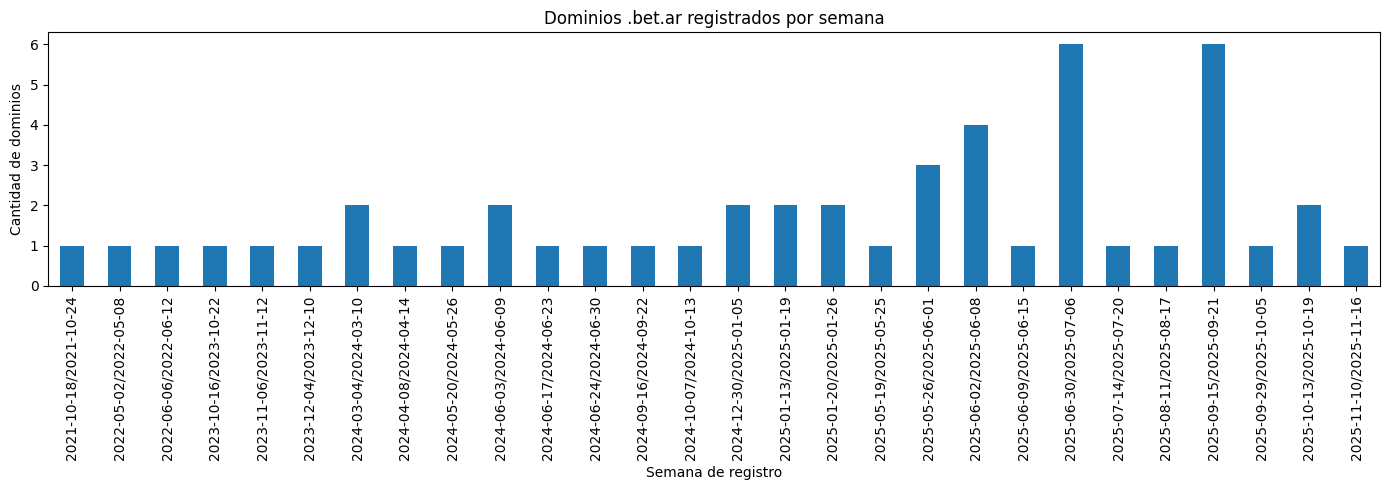

In [23]:
bet_ar = df[df['zona'] == 'bet.ar'].copy()

# Asegúrate de que la columna 'registered' sea datetime
bet_ar['registered'] = pd.to_datetime(bet_ar['registered'], errors='coerce')

# Extrae la semana de registro (formato: año-semana)
bet_ar['registered_week'] = bet_ar['registered'].dt.to_period('W').astype(str)

# Cuenta registros por semana
registros_por_semana = bet_ar['registered_week'].value_counts().sort_index()

# Muestra la tabla
print(registros_por_semana)

# Opcional: grafica el resultado
import matplotlib.pyplot as plt
registros_por_semana.plot(kind='bar', figsize=(14,5), title='Dominios .bet.ar registrados por semana')
plt.xlabel('Semana de registro')
plt.ylabel('Cantidad de dominios')
plt.tight_layout()
plt.show()

In [6]:
total_domains = len(df)

# Domains with at least one DNS
domains_with_dns = df[df['first_dns'].notna()]
count_with_dns = len(domains_with_dns)
percent_with_dns = 100 * count_with_dns / total_domains

# Domains with no DNS
domains_without_dns = df[df['first_dns'].isna()]
count_without_dns = len(domains_without_dns)
percent_without_dns = 100 * count_without_dns / total_domains

print(f"Total domain (active) in the DB {total_domains}")
print(f"Domains with at least one DNS: {count_with_dns} ({percent_with_dns:.2f}%)")
print(f"Domains with NO DNS: {count_without_dns} ({percent_without_dns:.2f}%)")

Total domain (active) in the DB 468091
Domains with at least one DNS: 374508 (80.01%)
Domains with NO DNS: 93583 (19.99%)
